In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_path='merged256_new_nov.tif'
image=cv2.imread(img_path)

In [4]:
x=cv2.imread(img_path)
type(x)

numpy.ndarray

In [5]:
img

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
img1=cv2.imread(img_path)
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [7]:
x_len=len(img1)
y_len=len(img1[0])

In [8]:
print(x_len)
print(y_len)

4096
4096


In [9]:
num_epochs=5

In [10]:
def neighbours(i,j, img):
    x=len(img)
    y=len(img[0])
    if i==0 or j==0:
        return []
    elif i==x-1 or j==y-1:
        return []
    else:
        return [[i-1,j-1], [i-1, j], [i-1, j+1], [i,j+1], [i+1,j+1], [i+1,j], [i+1,j-1], [i, j-1]]

In [11]:
def north(i,j):
    return [i-1,j]

def east(i,j):
    return [i, j+1]

def west(i,j):
    return [i, j-1]

def south(i,j):
    return [i+1,j]

In [12]:
def transitions(i,j, img):
    a=0
    lst=neighbours(i,j,img)
    lst.append([i-1, j-1])
    curr=img[i-1][j-1]
    for el in lst:
        if img[el[0]][ el[1]]==curr:
            pass
        else:
            if(curr==0 and img[el[0]][ el[1]]==255):
                a+=1
            curr=img[el[0]][ el[1]]
    return a    

In [13]:
## Pass 1

In [15]:
img=img1

In [16]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or s==255)
        flag5= bool(e==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255    

In [17]:
## Pass 2

In [18]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255

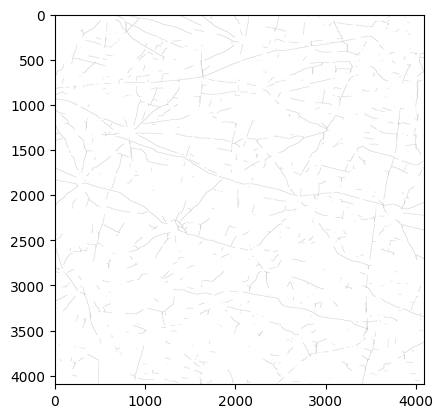

In [20]:
plt.imshow(img, cmap='gray')
plt.show()

In [21]:
from PIL import Image
image=Image.fromarray(img)
image.save('nov_thin.tif')

In [ ]:
'''https://rosettacode.org/wiki/Zhang-Suen_thinning_algorithm'''

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or s==255)
        flag5= bool(e==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255 

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
plt.imshow(img1)

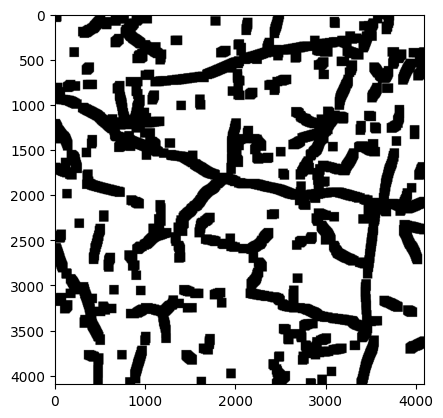

In [4]:
img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img)
plt.show()

In [8]:
image=cv2.imread(img_path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

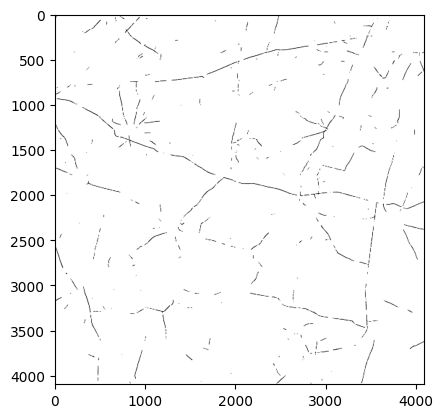

In [9]:
plt.imshow(binary_image, cmap='gray')

In [23]:
import cv2
import numpy as np

In [37]:
kernel = np.ones((40,40),np.uint8)

In [38]:
dilated_image = cv2.dilate(255-img, kernel, iterations=1)

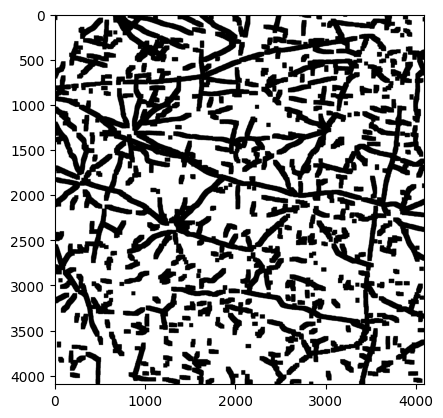

In [39]:
plt.imshow(255-dilated_image, cmap='gray')

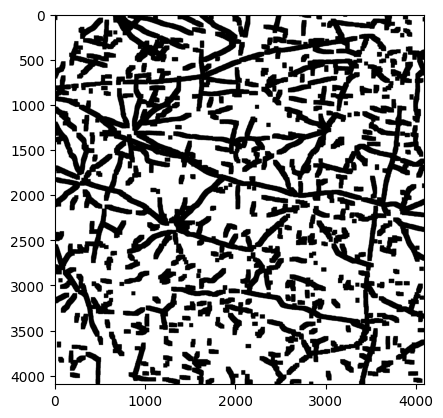

In [40]:
dil=255-dilated_image
plt.imshow(dil, cmap='gray')

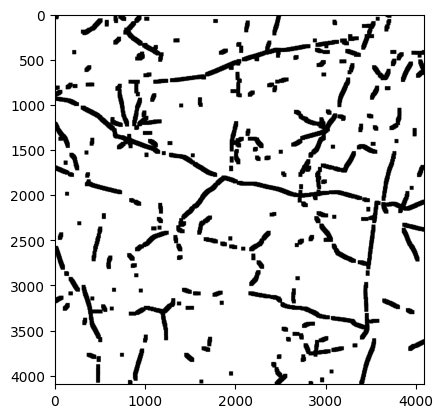

In [20]:
dilated_image = cv2.dilate(dilated_image, kernel, iterations=1)
plt.imshow(255-dilated_image, cmap='gray')

In [13]:
i=255-dilated_image
thinned = cv2.ximgproc.thinning(i)


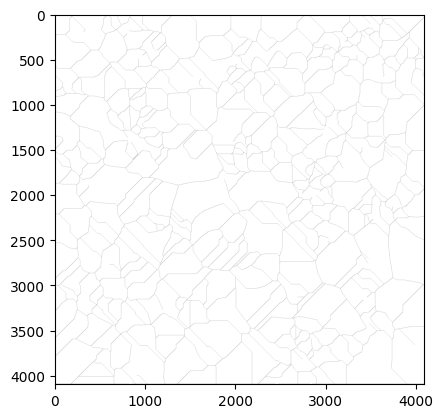

In [14]:
plt.imshow(255-thinned, cmap='gray')

In [ ]:
final=255-dilated_image

In [ ]:
plt.imshow(final, cmap='gray')

In [ ]:
img=final
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or s==255)
        flag5= bool(e==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255   

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255


plt.imshow(img,cmap='gray')

In [ ]:
for i in range(1, x_len-1):
    for j in range(1, y_len-1):
        flag1=bool(img[i][j]==0)
        b=0
        for el in neighbours(i,j, img):
            if img[el[0]] [el[1]]==0:
                b+=1

        flag2= bool(b>=2 and b<=6)
        flag3= bool(transitions(i, j, img)==1)
        n=img[north(i,j)[0]][ north(i,j)[1]]
        e=img[east(i,j)[0]][ east(i,j)[1]]
        w=img[west(i,j)[0]][ west(i,j)[1]]
        s=img[south(i,j)[0]][ south(i,j)[1]]

        flag4= bool(n==255 or e==255 or w==255)
        flag5= bool(n==255 or s==255 or w==255)

        if (flag1 and flag2 and flag3 and flag4 and flag5):
             img[i][j]=255


plt.imshow(img,cmap='gray')

In [63]:
kernel = np.ones((5,5),np.uint8)
final=cv2.dilate(255-img, kernel, iterations=1)

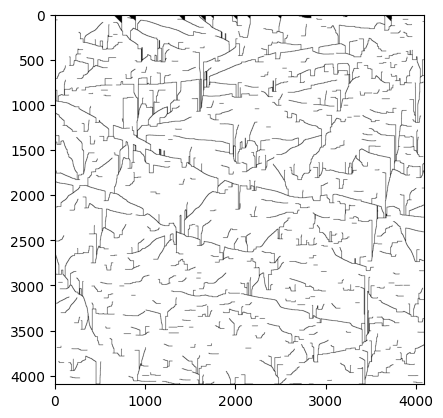

In [65]:
plt.imshow(255-final, cmap='gray')

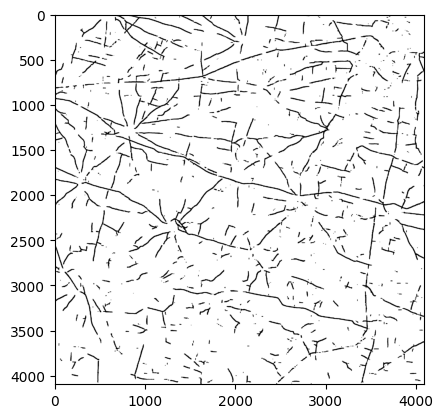

In [69]:
plt.imshow(image, cmap='gray')

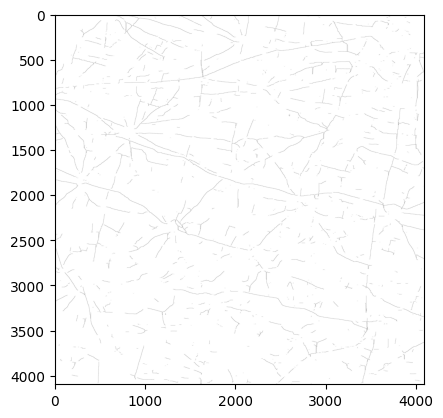

In [1]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('nov_thin.tif')
plt.imshow(img)

In [2]:
img1=255-img

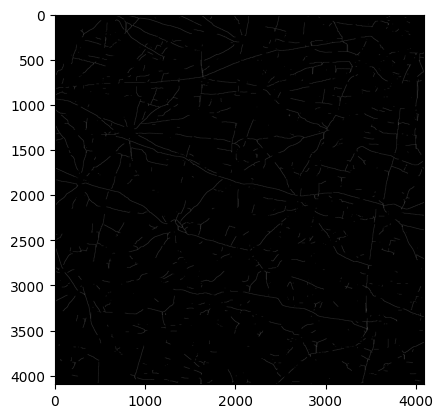

In [3]:
plt.imshow(img1)

In [4]:
from PIL import Image
image=Image.fromarray(img1)
image.save('nov_thin_dark.tif')